## INCOME을 소비내역과 여행객데이터로 유추하기

In [1]:
import pandas as pd

traveler_data=pd.read_csv('tn_traveller_master_여행객 Master.csv')
post_data=pd.read_csv('tn_adv_consume_his_사전소비내역.csv')
lod_data=pd.read_csv('tn_lodge_consume_his_숙박소비내역.csv')
traf_data=pd.read_csv('tn_mvmn_consume_his_이동수단소비내역.csv')
acti_data=pd.read_csv('tn_activity_consume_his_활동소비내역.csv')
companicon_data=pd.read_csv('tn_companion_info_동반자정보.csv')

In [2]:
traveler_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14400 entries, 0 to 14399
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   TRAVELER_ID                14400 non-null  object 
 1   RESIDENCE_SGG_CD           14400 non-null  int64  
 2   GENDER                     14400 non-null  object 
 3   AGE_GRP                    14400 non-null  int64  
 4   EDU_NM                     14400 non-null  int64  
 5   EDU_FNSH_SE                14399 non-null  float64
 6   MARR_STTS                  14398 non-null  float64
 7   FAMILY_MEMB                14400 non-null  int64  
 8   JOB_NM                     13753 non-null  float64
 9   JOB_ETC                    647 non-null    float64
 10  INCOME                     14400 non-null  int64  
 11  HOUSE_INCOME               10716 non-null  float64
 12  TRAVEL_TERM                14400 non-null  int64  
 13  TRAVEL_NUM                 14400 non-null  int

In [3]:
traveler_data['TRAVEL_ID'] = traveler_data['TRAVELER_ID'].apply(lambda x: x[0] + '_' + x)

### 여행일수 구하기

In [4]:
import datetime
traveler_data['start_day'] = traveler_data.TRAVEL_STATUS_YMD.str.split('~').str[0]
traveler_data['end_day'] = traveler_data.TRAVEL_STATUS_YMD.str.split('~').str[1]
traveler_data['start_day'] = pd.to_datetime(traveler_data['start_day'])
traveler_data['end_day'] = pd.to_datetime(traveler_data['end_day'])
trip_day_raw=traveler_data['end_day']-traveler_data['start_day']

traveler_data['trip_day']=trip_day_raw.dt.days + 1

In [5]:
traveler_data['trip_day'].value_counts()

trip_day
1     5834
2     4722
3     2518
4      873
5      287
6       73
7       44
8       22
9        7
10       6
11       3
16       3
15       2
12       1
14       1
17       1
27       1
33       1
23       1
Name: count, dtype: int64

In [6]:
traveler_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14400 entries, 0 to 14399
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   TRAVELER_ID                14400 non-null  object        
 1   RESIDENCE_SGG_CD           14400 non-null  int64         
 2   GENDER                     14400 non-null  object        
 3   AGE_GRP                    14400 non-null  int64         
 4   EDU_NM                     14400 non-null  int64         
 5   EDU_FNSH_SE                14399 non-null  float64       
 6   MARR_STTS                  14398 non-null  float64       
 7   FAMILY_MEMB                14400 non-null  int64         
 8   JOB_NM                     13753 non-null  float64       
 9   JOB_ETC                    647 non-null    float64       
 10  INCOME                     14400 non-null  int64         
 11  HOUSE_INCOME               10716 non-null  float64       
 12  TRAV

In [7]:
post_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3615 entries, 0 to 3614
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TRAVEL_ID        3615 non-null   object 
 1   ADV_NM           3615 non-null   object 
 2   ADV_SEQ          3615 non-null   int64  
 3   PAYMENT_NUM      3615 non-null   int64  
 4   BRNO             1705 non-null   float64
 5   STORE_NM         3543 non-null   object 
 6   ROAD_NM_ADDR     1869 non-null   object 
 7   LOTNO_ADDR       1318 non-null   object 
 8   ROAD_NM_CD       1744 non-null   float64
 9   LOTNO_CD         1744 non-null   float64
 10  PAYMENT_DT       2110 non-null   object 
 11  PAYMENT_MTHD_SE  3602 non-null   float64
 12  PAYMENT_AMT_WON  3615 non-null   int64  
 13  PAYMENT_ETC      3337 non-null   object 
 14  SGG_CD           1414 non-null   float64
dtypes: float64(5), int64(3), object(7)
memory usage: 423.8+ KB


In [8]:
lod_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11311 entries, 0 to 11310
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TRAVEL_ID            11311 non-null  object 
 1   LODGING_NM           11311 non-null  object 
 2   LODGING_PAYMENT_SEQ  11311 non-null  int64  
 3   LODGING_TYPE_CD      11311 non-null  int64  
 4   RSVT_YN              10693 non-null  object 
 5   CHK_IN_DT_MIN        10693 non-null  object 
 6   CHK_OUT_DT_MIN       10693 non-null  object 
 7   PAYMENT_NUM          11311 non-null  int64  
 8   BRNO                 3429 non-null   float64
 9   STORE_NM             5586 non-null   object 
 10  ROAD_NM_ADDR         9737 non-null   object 
 11  LOTNO_ADDR           7774 non-null   object 
 12  ROAD_NM_CD           4340 non-null   float64
 13  LOTNO_CD             4340 non-null   float64
 14  PAYMENT_DT           5278 non-null   object 
 15  PAYMENT_MTHD_SE      10717 non-null 

In [9]:
traf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38551 entries, 0 to 38550
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TRAVEL_ID        38551 non-null  object 
 1   MVMN_SE          38551 non-null  int64  
 2   PAYMENT_SE       38551 non-null  object 
 3   PAYMENT_SEQ      38551 non-null  int64  
 4   MVMN_SE_NM       38551 non-null  object 
 5   PAYMENT_NUM      38551 non-null  int64  
 6   BRNO             6906 non-null   float64
 7   STORE_NM         7161 non-null   object 
 8   PAYMENT_DT       8531 non-null   object 
 9   PAYMENT_MTHD_SE  8930 non-null   float64
 10  PAYMENT_AMT_WON  38549 non-null  float64
 11  PAYMENT_ETC      10851 non-null  object 
dtypes: float64(3), int64(3), object(6)
memory usage: 3.5+ MB


In [10]:
acti_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97460 entries, 0 to 97459
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TRAVEL_ID          97460 non-null  object 
 1   VISIT_AREA_ID      97460 non-null  int64  
 2   ACTIVITY_TYPE_CD   97460 non-null  int64  
 3   ACTIVITY_TYPE_SEQ  97460 non-null  int64  
 4   CONSUME_HIS_SEQ    97460 non-null  int64  
 5   CONSUME_HIS_SNO    97460 non-null  int64  
 6   PAYMENT_NUM        97460 non-null  int64  
 7   BRNO               74965 non-null  float64
 8   STORE_NM           96587 non-null  object 
 9   ROAD_NM_ADDR       86664 non-null  object 
 10  LOTNO_ADDR         59868 non-null  object 
 11  ROAD_NM_CD         78609 non-null  float64
 12  LOTNO_CD           78609 non-null  float64
 13  PAYMENT_DT         81572 non-null  object 
 14  PAYMENT_MTHD_SE    96996 non-null  float64
 15  PAYMENT_AMT_WON    97428 non-null  float64
 16  PAYMENT_ETC        597

In [11]:
companicon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21056 entries, 0 to 21055
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   COMPANION_SEQ        21056 non-null  int64 
 1   TRAVEL_ID            21056 non-null  object
 2   REL_CD               21056 non-null  int64 
 3   COMPANION_GENDER     21056 non-null  int64 
 4   COMPANION_AGE_GRP    21056 non-null  int64 
 5   COMPANION_SITUATION  21056 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 987.1+ KB


### 동반자 평균연령구하기

In [12]:
import numpy as np
companicon_data['COMPANION_AGE_avg']=10*(companicon_data['COMPANION_AGE_GRP']-1)+5

companicon_data['COMPANION_AGE_avg'] = companicon_data['COMPANION_AGE_avg'].apply(lambda x: [x])
companicon_data=companicon_data.groupby('TRAVEL_ID').agg({'COMPANION_AGE_avg': 'sum'})
#comp_age=companicon_data.groupby('TRAVELER_ID').agg({'COMPANION_AGE_avg': 'sum'})
print(companicon_data.info())

  #동반자 연령 평균
s=0
l=0
for i in companicon_data['COMPANION_AGE_avg']:
    l+=len(i)
    for j in i:
      s+=j
avg=s/l

from statistics import mean
companicon_data['age_avg']=np.nan
for i in range(len(companicon_data)):
    if len(companicon_data['COMPANION_AGE_avg'][i])>0:
        companicon_data['age_avg'][i]=mean(companicon_data['COMPANION_AGE_avg'][i])
    else:
        companicon_data['age_avg'][i]=np.nan

companicon_data=companicon_data.drop('COMPANION_AGE_avg',axis=1)

<class 'pandas.core.frame.DataFrame'>
Index: 11009 entries, a_a000007 to d_d012491
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   COMPANION_AGE_avg  11009 non-null  object
dtypes: object(1)
memory usage: 172.0+ KB
None


C:\Users\401-6\AppData\Local\Temp\ipykernel_2904\1705617916.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if len(companicon_data['COMPANION_AGE_avg'][i])>0:
C:\Users\401-6\AppData\Local\Temp\ipykernel_2904\1705617916.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  companicon_data['age_avg'][i]=mean(companicon_data['COMPANION_AGE_avg'][i])
C:\Users\401-6\AppData\Local\Temp\ipykernel_2904\1705617916.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

In [13]:
companicon_data = companicon_data.reset_index()
companicon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11009 entries, 0 to 11008
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TRAVEL_ID  11009 non-null  object 
 1   age_avg    11009 non-null  float64
dtypes: float64(1), object(1)
memory usage: 172.1+ KB


In [14]:
companicon_data

,TRAVEL_ID,age_avg
0,a_a000007,37.000000
1,a_a000011,29.000000
2,a_a000013,25.000000
3,a_a000014,56.666667
4,a_a000018,21.666667
...,...,...
11004,d_d012443,20.000000
11005,d_d012446,10.000000
11006,d_d012472,40.000000
11007,d_d012487,35.000000


### 데이터 병합 및 비용평균 및 비용합계 구하기

In [15]:
traveler_data_puri = traveler_data[['TRAVEL_ID', 'INCOME', 'AGE_GRP', 'TRAVEL_COMPANIONS_NUM','TRAVEL_STATUS_DESTINATION','trip_day']]
post_data_puri = post_data[['TRAVEL_ID', 'PAYMENT_AMT_WON', 'PAYMENT_NUM']]
lod_data_puri = lod_data[['TRAVEL_ID', 'PAYMENT_AMT_WON', 'PAYMENT_NUM']]
traf_data_puri = traf_data[['TRAVEL_ID', 'PAYMENT_AMT_WON', 'PAYMENT_NUM']]
acti_data_puri = acti_data[['TRAVEL_ID', 'PAYMENT_AMT_WON', 'PAYMENT_NUM']]
companicon_data_puri = companicon_data[['TRAVEL_ID', 'age_avg']]

In [16]:
post_data_puri.rename(columns={'PAYMENT_AMT_WON': 'POST_PAYMENT_AMT_WON', 'PAYMENT_NUM': 'POST_PAYMENT_NUM'}, inplace=True)
lod_data_puri.rename(columns={'PAYMENT_AMT_WON': 'LOD_PAYMENT_AMT_WON', 'PAYMENT_NUM': 'LOD_PAYMENT_NUM'}, inplace=True)
traf_data_puri.rename(columns={'PAYMENT_AMT_WON': 'TRAF_PAYMENT_AMT_WON', 'PAYMENT_NUM': 'TRAF_PAYMENT_NUM'}, inplace=True)
acti_data_puri.rename(columns={'PAYMENT_AMT_WON': 'ACTI_PAYMENT_AMT_WON', 'PAYMENT_NUM': 'ACTI_PAYMENT_NUM'}, inplace=True)

C:\Users\401-6\AppData\Local\Temp\ipykernel_2904\469639654.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_data_puri.rename(columns={'PAYMENT_AMT_WON': 'POST_PAYMENT_AMT_WON', 'PAYMENT_NUM': 'POST_PAYMENT_NUM'}, inplace=True)
C:\Users\401-6\AppData\Local\Temp\ipykernel_2904\469639654.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lod_data_puri.rename(columns={'PAYMENT_AMT_WON': 'LOD_PAYMENT_AMT_WON', 'PAYMENT_NUM': 'LOD_PAYMENT_NUM'}, inplace=True)
C:\Users\401-6\AppData\Local\Temp\ipykernel_2904\469639654.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

In [17]:
tmplst = ['POST','LOD','TRAF','ACTI']
for tmp in tmplst:
    globals()[f'{tmp.lower()}_data_puri'][f'ALL_{tmp}_PAYMENT_AMT_WON'] = globals()[f'{tmp.lower()}_data_puri'].groupby('TRAVEL_ID')[f'{tmp}_PAYMENT_AMT_WON'].transform('sum')
    globals()[f'{tmp.lower()}_data_puri'][f'ALL_{tmp}_PAYMENT_AMT_WON_mean'] = globals()[f'{tmp.lower()}_data_puri'].groupby('TRAVEL_ID')[f'{tmp}_PAYMENT_AMT_WON'].transform('sum')/globals()[f'{tmp.lower()}_data_puri'][f'{tmp}_PAYMENT_NUM']


C:\Users\401-6\AppData\Local\Temp\ipykernel_2904\2089803447.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  globals()[f'{tmp.lower()}_data_puri'][f'ALL_{tmp}_PAYMENT_AMT_WON'] = globals()[f'{tmp.lower()}_data_puri'].groupby('TRAVEL_ID')[f'{tmp}_PAYMENT_AMT_WON'].transform('sum')
C:\Users\401-6\AppData\Local\Temp\ipykernel_2904\2089803447.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  globals()[f'{tmp.lower()}_data_puri'][f'ALL_{tmp}_PAYMENT_AMT_WON_mean'] = globals()[f'{tmp.lower()}_data_puri'].gro

In [18]:
for tmp in tmplst:
    print(globals()[f'{tmp.lower()}_data_puri'].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3615 entries, 0 to 3614
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   TRAVEL_ID                      3615 non-null   object 
 1   POST_PAYMENT_AMT_WON           3615 non-null   int64  
 2   POST_PAYMENT_NUM               3615 non-null   int64  
 3   ALL_POST_PAYMENT_AMT_WON       3615 non-null   int64  
 4   ALL_POST_PAYMENT_AMT_WON_mean  3615 non-null   float64
dtypes: float64(1), int64(3), object(1)
memory usage: 141.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11311 entries, 0 to 11310
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   TRAVEL_ID                     11311 non-null  object 
 1   LOD_PAYMENT_AMT_WON           11311 non-null  int64  
 2   LOD_PAYMENT_NUM               11311 non-null  int64  
 3

In [19]:
import numpy as np
combined_data = pd.merge(post_data_puri, lod_data_puri, on='TRAVEL_ID', how='outer')
combined_data = pd.merge(combined_data, traf_data_puri, on='TRAVEL_ID', how='outer')
combined_data = pd.merge(combined_data, acti_data_puri, on='TRAVEL_ID', how='outer')
combined_data = pd.merge(companicon_data_puri, combined_data, on='TRAVEL_ID', how='outer')
combined_data = pd.merge(traveler_data_puri, combined_data, on='TRAVEL_ID', how='inner')


combined_data.reset_index(drop = True, inplace = True)
combined_data.drop_duplicates(['TRAVEL_ID'], inplace = True)
print(combined_data)

        TRAVEL_ID  INCOME  AGE_GRP  TRAVEL_COMPANIONS_NUM  \
0       b_b015583       3       20                      1   
4       a_a001105       4       30                      7   
20      a_a001673       5       30                      2   
44      a_a017690       5       30                      3   
46      c_c006666       3       30                      0   
...           ...     ...      ...                    ...   
470856  d_d012387       4       40                      0   
470857  d_d004823       5       40                      0   
470865  d_d006166       2       50                      2   
470955  d_d011757       3       20                      1   
471123  d_d006693       3       20                      0   

       TRAVEL_STATUS_DESTINATION  trip_day  age_avg  POST_PAYMENT_AMT_WON  \
0                             충남         2     25.0               24000.0   
4                             경기         2     31.0                   NaN   
20                            서울    

In [20]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14395 entries, 0 to 471123
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   TRAVEL_ID                      14395 non-null  object 
 1   INCOME                         14395 non-null  int64  
 2   AGE_GRP                        14395 non-null  int64  
 3   TRAVEL_COMPANIONS_NUM          14395 non-null  int64  
 4   TRAVEL_STATUS_DESTINATION      14395 non-null  object 
 5   trip_day                       14395 non-null  int64  
 6   age_avg                        9909 non-null   float64
 7   POST_PAYMENT_AMT_WON           2879 non-null   float64
 8   POST_PAYMENT_NUM               2879 non-null   float64
 9   ALL_POST_PAYMENT_AMT_WON       2879 non-null   float64
 10  ALL_POST_PAYMENT_AMT_WON_mean  2879 non-null   float64
 11  LOD_PAYMENT_AMT_WON            7198 non-null   float64
 12  LOD_PAYMENT_NUM                7198 non-null   flo

### 제주도데이터만 남기기

In [21]:
unique_counts = combined_data['TRAVEL_STATUS_DESTINATION'].value_counts()
print(unique_counts)

TRAVEL_STATUS_DESTINATION
제주       2803
경기       2155
강원       1408
서울       1248
전남       1010
충남        938
경북        865
전북        740
경남        652
충북        572
인천        523
부산        518
대전        307
대구        215
울산        149
광주        132
세종         97
도서 지역      63
Name: count, dtype: int64


In [22]:
combined_data = combined_data[combined_data['TRAVEL_STATUS_DESTINATION'] == '제주']

In [23]:
len(combined_data['TRAVEL_ID'].unique())

2803

In [24]:
combined_data.columns

Index(['TRAVEL_ID', 'INCOME', 'AGE_GRP', 'TRAVEL_COMPANIONS_NUM',
       'TRAVEL_STATUS_DESTINATION', 'trip_day', 'age_avg',
       'POST_PAYMENT_AMT_WON', 'POST_PAYMENT_NUM', 'ALL_POST_PAYMENT_AMT_WON',
       'ALL_POST_PAYMENT_AMT_WON_mean', 'LOD_PAYMENT_AMT_WON',
       'LOD_PAYMENT_NUM', 'ALL_LOD_PAYMENT_AMT_WON',
       'ALL_LOD_PAYMENT_AMT_WON_mean', 'TRAF_PAYMENT_AMT_WON',
       'TRAF_PAYMENT_NUM', 'ALL_TRAF_PAYMENT_AMT_WON',
       'ALL_TRAF_PAYMENT_AMT_WON_mean', 'ACTI_PAYMENT_AMT_WON',
       'ACTI_PAYMENT_NUM', 'ALL_ACTI_PAYMENT_AMT_WON',
       'ALL_ACTI_PAYMENT_AMT_WON_mean'],
      dtype='object')

In [25]:
combined_data['ALL_PAYMENT_AMT_WON'] = combined_data[[f'ALL_{tmp}_PAYMENT_AMT_WON' for tmp in tmplst]].sum(axis=1)
combined_data['ALL_PAYMENT_AMT_WON_mean'] = combined_data[[f'ALL_{tmp}_PAYMENT_AMT_WON_mean' for tmp in tmplst]].sum(axis=1)

In [26]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2803 entries, 1483 to 471123
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   TRAVEL_ID                      2803 non-null   object 
 1   INCOME                         2803 non-null   int64  
 2   AGE_GRP                        2803 non-null   int64  
 3   TRAVEL_COMPANIONS_NUM          2803 non-null   int64  
 4   TRAVEL_STATUS_DESTINATION      2803 non-null   object 
 5   trip_day                       2803 non-null   int64  
 6   age_avg                        1884 non-null   float64
 7   POST_PAYMENT_AMT_WON           497 non-null    float64
 8   POST_PAYMENT_NUM               497 non-null    float64
 9   ALL_POST_PAYMENT_AMT_WON       497 non-null    float64
 10  ALL_POST_PAYMENT_AMT_WON_mean  497 non-null    float64
 11  LOD_PAYMENT_AMT_WON            2220 non-null   float64
 12  LOD_PAYMENT_NUM                2220 non-null   f

In [27]:
combined_data['ALL_PAYMENT_AMT_WON_mean_by_day'] = combined_data['ALL_PAYMENT_AMT_WON_mean']/combined_data['trip_day']
#combined_data= combined_data.reset_index()

In [28]:
combined_data.columns

Index(['TRAVEL_ID', 'INCOME', 'AGE_GRP', 'TRAVEL_COMPANIONS_NUM',
       'TRAVEL_STATUS_DESTINATION', 'trip_day', 'age_avg',
       'POST_PAYMENT_AMT_WON', 'POST_PAYMENT_NUM', 'ALL_POST_PAYMENT_AMT_WON',
       'ALL_POST_PAYMENT_AMT_WON_mean', 'LOD_PAYMENT_AMT_WON',
       'LOD_PAYMENT_NUM', 'ALL_LOD_PAYMENT_AMT_WON',
       'ALL_LOD_PAYMENT_AMT_WON_mean', 'TRAF_PAYMENT_AMT_WON',
       'TRAF_PAYMENT_NUM', 'ALL_TRAF_PAYMENT_AMT_WON',
       'ALL_TRAF_PAYMENT_AMT_WON_mean', 'ACTI_PAYMENT_AMT_WON',
       'ACTI_PAYMENT_NUM', 'ALL_ACTI_PAYMENT_AMT_WON',
       'ALL_ACTI_PAYMENT_AMT_WON_mean', 'ALL_PAYMENT_AMT_WON',
       'ALL_PAYMENT_AMT_WON_mean', 'ALL_PAYMENT_AMT_WON_mean_by_day'],
      dtype='object')

### 데이터들 간의 상관관계보기

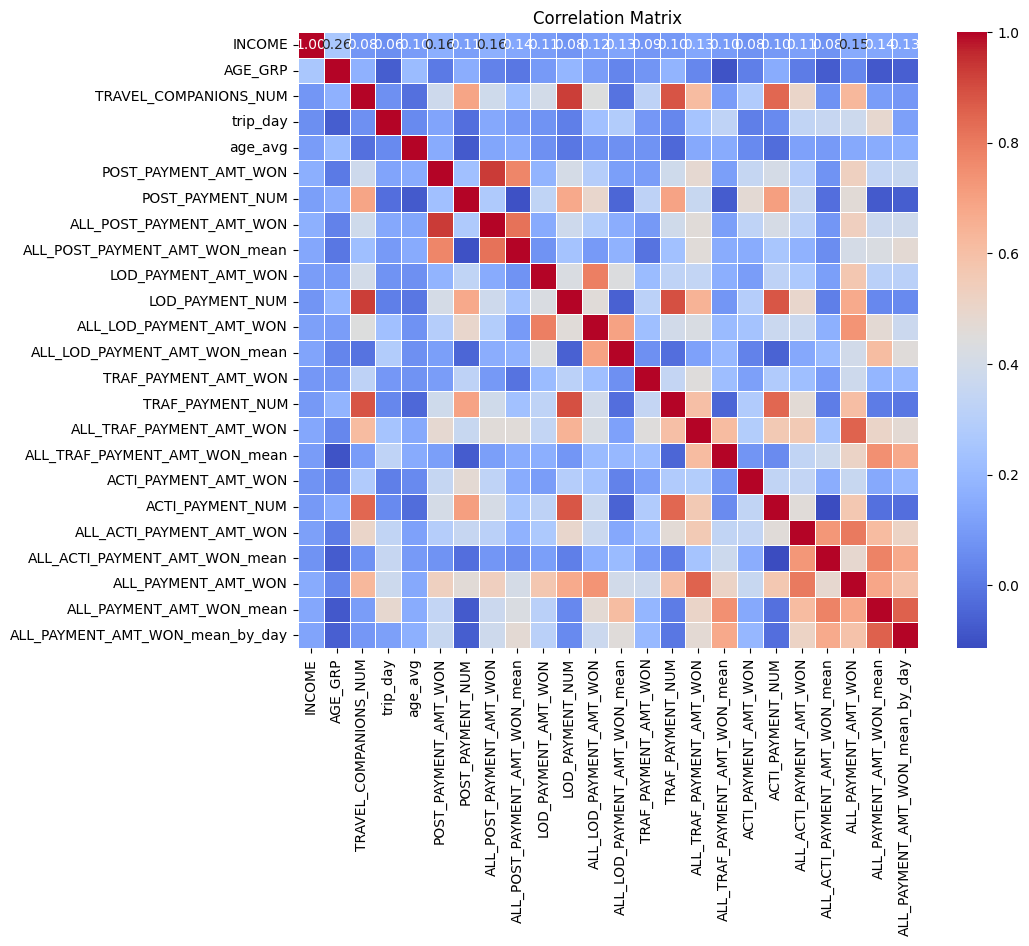

                                   INCOME   AGE_GRP  TRAVEL_COMPANIONS_NUM  \
INCOME                           1.000000  0.256184               0.083940   
AGE_GRP                          0.256184  1.000000               0.170338   
TRAVEL_COMPANIONS_NUM            0.083940  0.170338               1.000000   
trip_day                         0.060668 -0.069945               0.068457   
age_avg                          0.100803  0.209452              -0.020181   
POST_PAYMENT_AMT_WON             0.164022  0.006050               0.380887   
POST_PAYMENT_NUM                 0.109262  0.158115               0.690667   
ALL_POST_PAYMENT_AMT_WON         0.164941  0.026427               0.386008   
ALL_POST_PAYMENT_AMT_WON_mean    0.138300 -0.004186               0.225503   
LOD_PAYMENT_AMT_WON              0.107215  0.099140               0.399295   
LOD_PAYMENT_NUM                  0.080644  0.190265               0.929741   
ALL_LOD_PAYMENT_AMT_WON          0.116442  0.103896             

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

new_dataframe = combined_data.drop(['TRAVEL_ID','TRAVEL_STATUS_DESTINATION'], axis=1)

correlation_matrix = new_dataframe.corr()

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

print(correlation_matrix)

### ALL_PAYMENT_AMT_WON_mean과 AGE_GRP을 이용해서 INCOME 예상하기

In [32]:
combined_data['ALL_PAYMENT_AMT_WON_mean'].describe()

count    2.803000e+03
mean     4.392387e+05
std      3.605911e+05
min      0.000000e+00
25%      1.652625e+05
50%      3.957900e+05
75%      5.999210e+05
max      4.857000e+06
Name: ALL_PAYMENT_AMT_WON_mean, dtype: float64

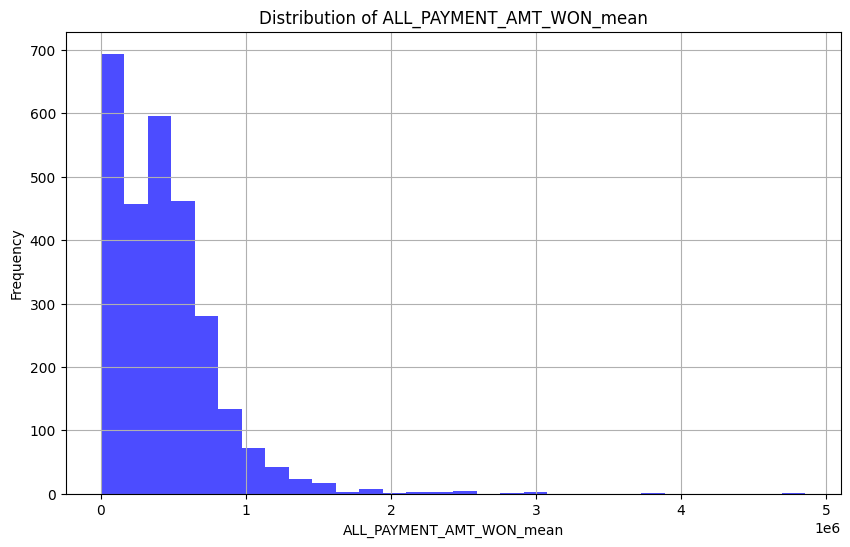

In [33]:
import matplotlib.pyplot as plt

# 'ALL_PAYMENT_AMT_WON'의 분포를 히스토그램으로 시각화
plt.figure(figsize=(10, 6))
plt.hist(combined_data['ALL_PAYMENT_AMT_WON_mean'], bins=30, color='blue', alpha=0.7)
plt.title('Distribution of ALL_PAYMENT_AMT_WON_mean')
plt.xlabel('ALL_PAYMENT_AMT_WON_mean')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [34]:
tmplst = combined_data[combined_data['ALL_PAYMENT_AMT_WON_mean']<600000]
print(len(tmplst)/len(combined_data['ALL_PAYMENT_AMT_WON_mean']))

0.7502675704602212


### 60만원이상이면 고지출, 60만원 이하면 저지출로 분류

In [35]:
combined_data['ALL_PAYMENT_AMT_WON_mean_sep'] = np.where(combined_data['ALL_PAYMENT_AMT_WON_mean'] < 600000, 0, 1)


### INCOME 고소득, 저소득으로 분류

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import joblib
X = combined_data[['AGE_GRP','ALL_PAYMENT_AMT_WON_mean_sep']]
y = combined_data['INCOME']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train = np.where(y_train >= 5, 5, y_train)
y_train = np.where(y_train <= 3, 3, y_train)
y_train = np.where((y_train == 4), 4, y_train)
y_test = np.where(y_test >= 5, 5, y_test)
y_test = np.where(y_test <= 3, 3, y_test)
y_test = np.where((y_test == 4), 4, y_test)

y_train = np.where(y_train == 3, 0, y_train)
y_train = np.where(y_train == 4, 1, y_train)
y_train = np.where(y_train == 5, 1, y_train)
y_test = np.where(y_test == 3, 0, y_test)
y_test = np.where(y_test == 4, 1, y_test)
y_test = np.where(y_test == 5, 1, y_test)

y_test_series = pd.Series(y_test)
value_counts = y_test_series.value_counts()
print(value_counts)

y_train_series = pd.Series(y_train)

value_counts = y_train_series.value_counts()
print(value_counts)

1    373
0    188
Name: count, dtype: int64
1    1442
0     800
Name: count, dtype: int64


### 모델 평가 RandomForestClassifier

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf_model = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)


grid_search.fit(X_train, y_train)
print("Best Parameters: ", grid_search.best_params_)

best_rf_model = grid_search.best_estimator_

predictions = best_rf_model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')

print('\nClassification Report:')
print(classification_report(y_test, predictions))

print('\nConfusion Matrix:')
print(confusion_matrix(y_test, predictions))

Best Parameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy: 0.68

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.45      0.48       188
           1       0.74      0.80      0.77       373

    accuracy                           0.68       561
   macro avg       0.63      0.62      0.63       561
weighted avg       0.67      0.68      0.67       561


Confusion Matrix:
[[ 84 104]
 [ 75 298]]


### 모델평가 XGBoostClassifier

In [45]:
from xgboost import XGBClassifier

# XGBoost 모델 초기화
xgb_model = XGBClassifier()

# 탐색할 하이퍼파라미터 그리드 설정
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
}

# GridSearchCV 객체 생성
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1)

# Grid Search 실행
grid_search_xgb.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("Best Parameters (XGBoost): ", grid_search_xgb.best_params_)

# 최적의 모델 사용
best_xgb_model = grid_search_xgb.best_estimator_

# 테스트 데이터에 대한 예측
predictions_xgb = best_xgb_model.predict(X_test)

# 정확도 및 기타 평가 지표 출력
accuracy_xgb = accuracy_score(y_test, predictions_xgb)
print(f'Accuracy (XGBoost): {accuracy_xgb:.2f}')

# 분류 보고서 출력
print('\nClassification Report (XGBoost):')
print(classification_report(y_test, predictions_xgb))

# 혼동 행렬 출력
print('\nConfusion Matrix (XGBoost):')
print(confusion_matrix(y_test, predictions_xgb))


Best Parameters (XGBoost):  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
Accuracy (XGBoost): 0.66

Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.50      0.02      0.03       188
           1       0.67      0.99      0.80       373

    accuracy                           0.66       561
   macro avg       0.58      0.50      0.41       561
weighted avg       0.61      0.66      0.54       561


Confusion Matrix (XGBoost):
[[  3 185]
 [  3 370]]


### 분류모델로 RandomForestClassifier 선택 및 저장

In [46]:
import joblib
joblib.dump(best_rf_model,'rf_model_for_income.pkl')

['rf_model_for_income.pkl']